In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:/thesis_data/pluviometric_data/chuvas_C_01547017.csv', sep=',')
df

,Data,Total
0,01/04/2021,93.9
1,01/03/2021,90.3
2,01/02/2021,351.2
3,01/01/2021,211.3
4,01/12/2020,148.6
...,...,...
458,01/12/1978,73.3
459,01/11/1978,37.2
460,01/10/1978,78.7
461,01/09/1978,4.5


In [4]:
df['Date'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df.set_index(df['Data'], inplace=True)
df.dropna(inplace=True)
df.head()

,Data,Total,Date
Data,,,
01/04/2021,01/04/2021,93.9,2021-04-01
01/03/2021,01/03/2021,90.3,2021-03-01
01/02/2021,01/02/2021,351.2,2021-02-01
01/01/2021,01/01/2021,211.3,2021-01-01
01/12/2020,01/12/2020,148.6,2020-12-01


In [5]:
df = df.drop('Data', axis=1)

In [12]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df

,Total,Date,month,year
Data,,,,
01/04/2021,93.9,2021-04-01,4,2021
01/03/2021,90.3,2021-03-01,3,2021
01/02/2021,351.2,2021-02-01,2,2021
01/01/2021,211.3,2021-01-01,1,2021
01/12/2020,148.6,2020-12-01,12,2020
...,...,...,...,...
01/12/1978,73.3,1978-12-01,12,1978
01/11/1978,37.2,1978-11-01,11,1978
01/10/1978,78.7,1978-10-01,10,1978


In [13]:
d = df.groupby(df['Date'].dt.month)['Total'].mean()

In [16]:
y = df.groupby(df['Date'].dt.year)['Total'].sum()

In [17]:
d = pd.DataFrame(d)
d.head()

,Total
Date,
1,191.853846
2,163.982051
3,180.474359
4,107.405128
5,26.339474


In [18]:
y = pd.DataFrame(y)
y.head()

,Total
Date,
1978,193.7
1979,1266.7
1980,1099.5
1981,1341.6
1982,1026.1


In [19]:
d['mes'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

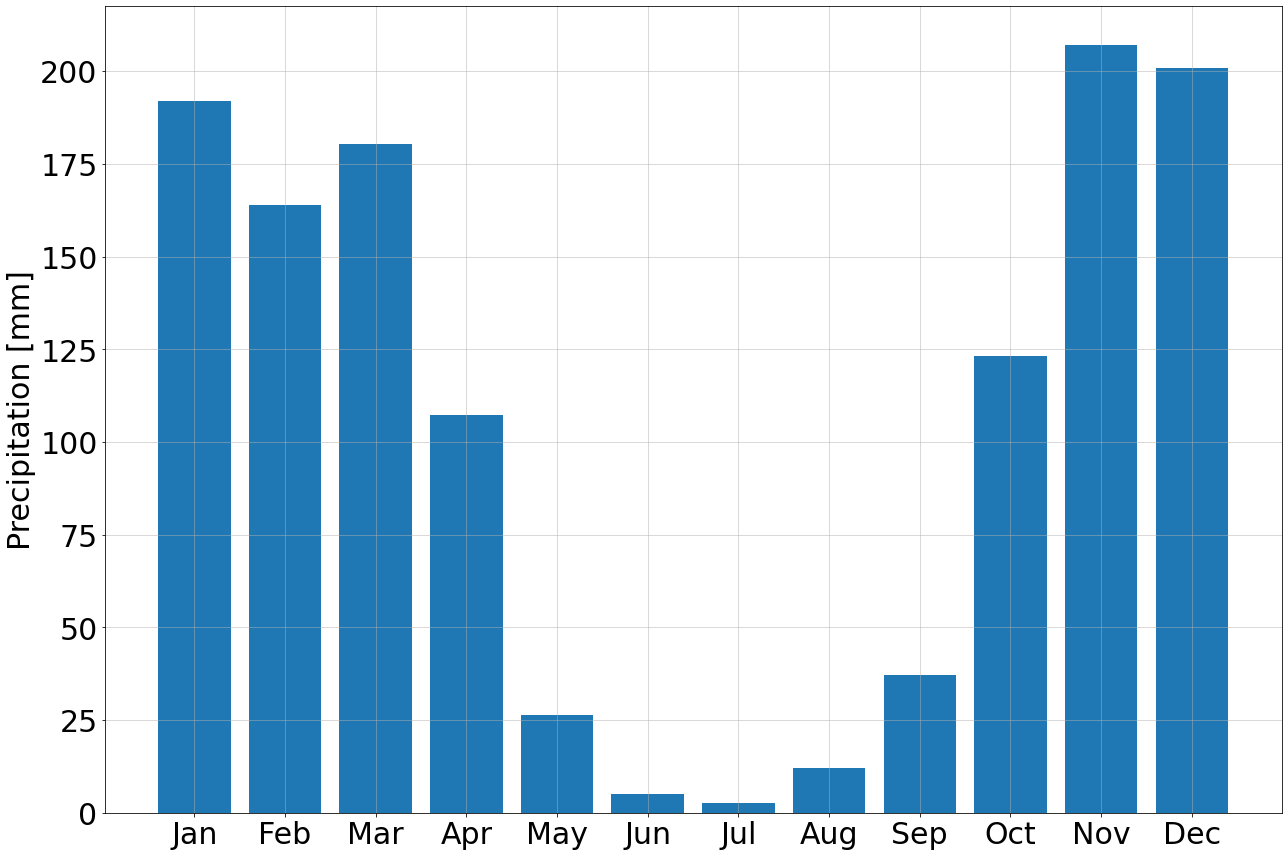

In [20]:
fig, ax = plt.subplots(figsize=(18,12))

plt.bar(d.mes, d['Total'])
#plt.title("Monthly Precipitation Mean (1978-2021)", fontsize=18)
plt.grid(alpha=0.6)
plt.ylabel('Precipitation [mm]', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/month_mean_prec.png', dpi=300, facecolor='w', edgecolor='w',
#         orientation='landscape', format='png', transparent=False)

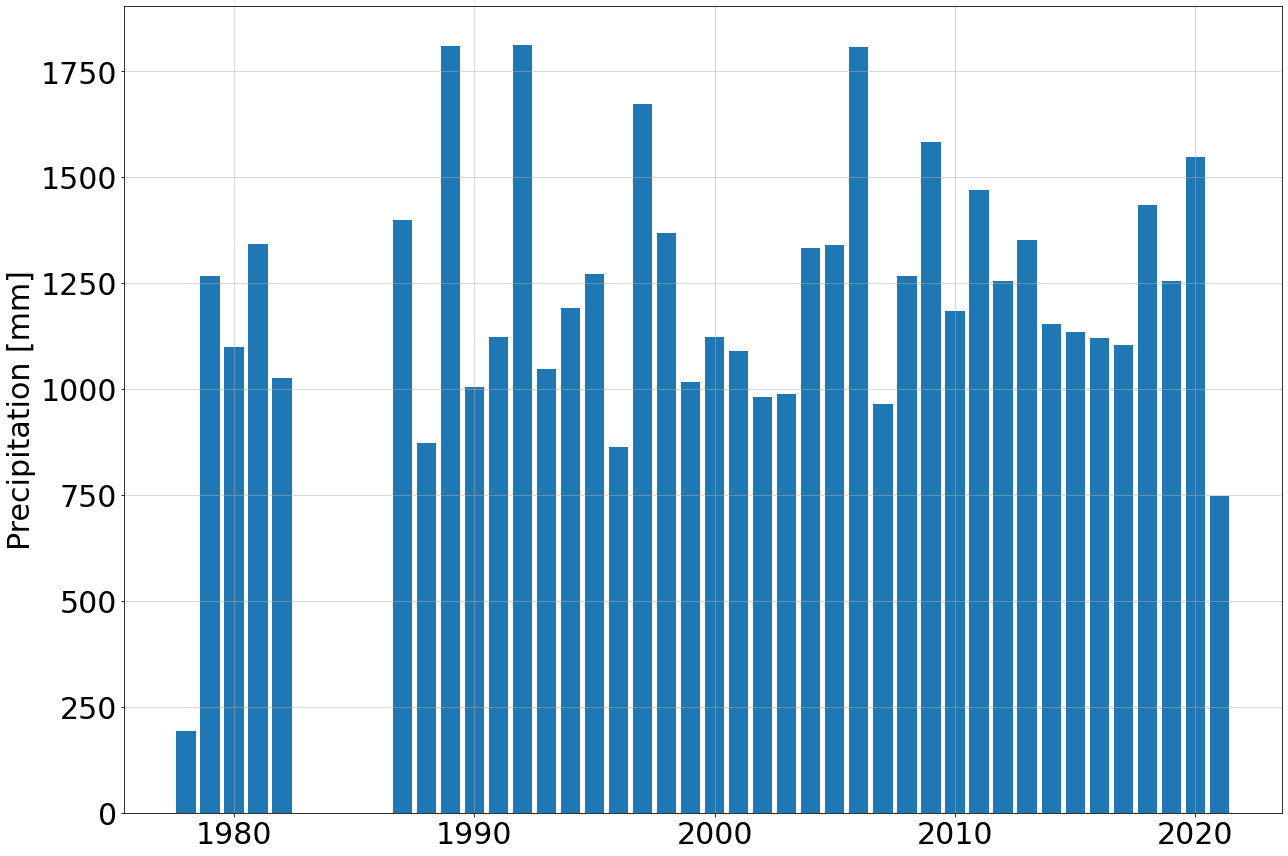

In [22]:
fig, ax = plt.subplots(figsize=(18,12))

plt.bar(y.index, y['Total'])
#plt.title("Monthly Precipitation Mean (1978-2021)", fontsize=18)
plt.grid(alpha=0.6)
plt.ylabel('Precipitation [mm]', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()